Sem:6 Div:B

Team Id:B8

Branch: Computer Science & Engineering

Title: Predicting Disease Spread

Goal: The Goal is to predict the number of dengue fever cases reported each week.

Build a model: The aim is to Develop a Model that would be able to predict the number of dengue cases each week.

Team Members:
                Sagar M,
                Pavan K,
                Prajwal H,
                Sunil N.
                
Algorithm Used: Linear Regression

 Python library is a collection of functions and methods that allows to perform lots of actions.

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import statsmodels.api as sm
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
filterwarnings('ignore')
%matplotlib inline


To build a model we require some set of data, so here we are loading the data provided by the National Oceanic and Atmospheric Administration (NOAA), an agency of the U.S. Department of Commerce.  

In [20]:
# loading the provided data
df_train = pd.read_csv('C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Training_Data_Features.csv', sep=',')
df_labels = pd.read_csv('C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv', sep=',')
df_test = pd.read_csv('C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Test_Data_Features.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']

In [21]:
print("We have",df_train.shape[0], "cases in the training set and", 
      df_test.shape[0], "in the test set.")
print("In total we have", df_train.shape[0] + df_test.shape[0], "data.")

We have 1456 cases in the training set and 416 in the test set.
In total we have 1872 data.


The problem description gives a good overview of the available variables, but we will look at the head of the data here

In [22]:
 df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [23]:
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [24]:
df_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [25]:
df_labels.describe()


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


Let's check to see if we are missing any values in this dataset

In [26]:
print(pd.isnull(df_train).sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

since our data is based on time series we will fill data with most recent value.

In [27]:
df_train.fillna(method='ffill', inplace=True)

Since we hypothesize that the spread of dengue may follow different patterns between the two cities, we will divide the dataset, train seperate models for each city, and then join our predictions before making our final submission.

In [28]:
# Seperate data for San Juan and Iquitos
df_train_sj = df_train[df_train['city'] == 'sj']
df_train_iq = df_train[df_train['city'] == 'iq']

Visualizing the total case of dengue with respect to year distribution for both cities 

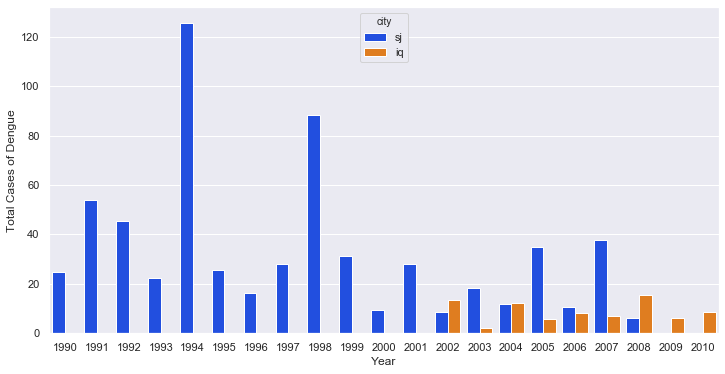

In [29]:

import seaborn as sns
sns.set(style="darkgrid", palette="bright")
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='total_cases', hue='city', ci=None, data=df_labels)
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue');

Our primary purpose here is to get a better understanding of the features. The first thing we will add the total_cases to our dataframe, and then look at the correlation of that variable with the climate variables.

Compute the data correlation matrix for san Juan

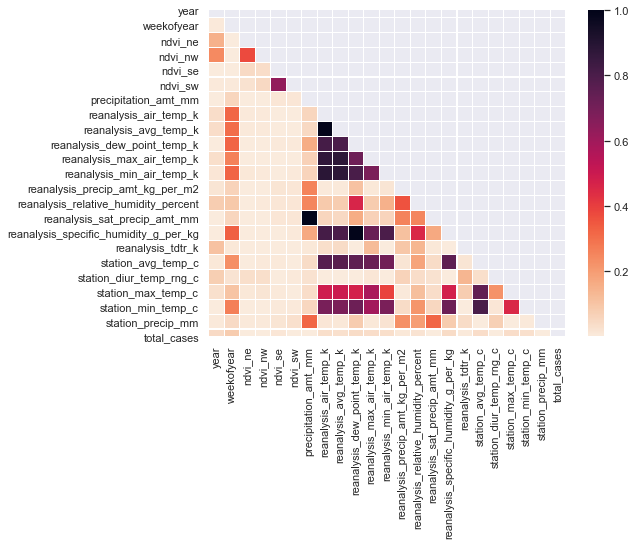

In [30]:

plt.figure(figsize=(8, 6))

corr_sj = df_train_sj.corr()**2
mask_sj = np.zeros_like(corr_sj)
mask_sj[np.triu_indices_from(mask_sj)] = True
with sns.axes_style("dark"):
    sns.heatmap(corr_sj, mask=mask_sj, linewidth=.08, cmap=sns.cm.rocket_r)

Compute the data correlation matrix for Iquitos

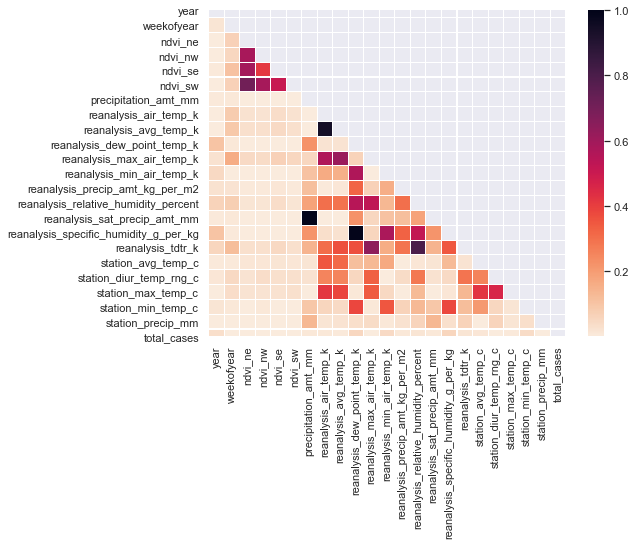

In [31]:

plt.figure(figsize=(8, 6))

corr_iq = df_train_iq.corr()**2
mask_iq = np.zeros_like(corr_iq)
mask_iq[np.triu_indices_from(mask_iq)] = True

with sns.axes_style("dark"):
    sns.heatmap(corr_iq, mask=mask_iq, linewidth=.08, cmap=sns.cm.rocket_r)

Many of the temperature data are strongly correlated, which is expected. But the total_cases variable doesn't have many obvious strong correlations.

Interestingly, total_cases seems to only have weak correlations with other variables. Many of the climate variables are much more strongly correlated. Interestingly, the vegetation index also only has weak correlation with other variables. 

Now we have explored this data,first step is to build a function that does all of the preprocessing we have done above from start to finish. since it needs to be applied to the test set and the traning set before we make our predictions.

The rolling mean method used to smoothing the noisy data

In [32]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

def preprocess_data(data_path, labels_path=None):
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c',
                'precipitation_amt_mm',
                'ndvi_ne',
                'reanalysis_sat_precip_amt_mm',
                'ndvi_sw',
                'reanalysis_precip_amt_kg_per_m2',
                'station_min_temp_c',
#                 'precipitation_amt_mm', 
                'week_start_date']
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
            
    df['station_avg_temp_c_mv_avg'] = df['station_avg_temp_c'].rolling(window=50).mean()
    df['precipitation_amt_mm_mv_avg'] = df['precipitation_amt_mm'].rolling(window=50).mean()
    features.append('station_avg_temp_c_mv_avg')
    features.append('precipitation_amt_mm_mv_avg') 
    
    df['reanalysis_sat_precip_amt_mm'] =  df['reanalysis_sat_precip_amt_mm'].shift(-20)
    
    df['ndvi_ne_avg'] = df['ndvi_ne'].rolling(window=10).mean()
    features.append('ndvi_ne_avg')
    
    df['ndvi_sw_avg'] = df['ndvi_sw'].rolling(window=30).mean().shift(-10)
    features.append('ndvi_sw_avg')
    
    
    df['reanalysis_precip_amt_kg_per_m2_avg'] = df['reanalysis_precip_amt_kg_per_m2'].rolling(window=50).mean()
    features.append('reanalysis_precip_amt_kg_per_m2_avg')
    
    
    
    df['reanalysis_specific_humidity_g_per_kg_avg'] = df['reanalysis_specific_humidity_g_per_kg'].rolling(window=50).mean()
    features.append('reanalysis_specific_humidity_g_per_kg_avg')
    
    
    df['reanalysis_dew_point_temp_k_avg'] = df['reanalysis_dew_point_temp_k'].rolling(window=35).mean()
    features.append('reanalysis_dew_point_temp_k_avg')

    
    df.fillna(method='ffill', inplace=True)
    df = df.fillna(df.mean())
    
    
    
    df = df.drop(['week_start_date'], axis=1)
    features.remove('week_start_date')
    df = df[features]    
    sj_label = None
    iq_label = None
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2]).loc[df.index]
        sj_label = pd.DataFrame(labels.loc['sj'])
        iq_label = pd.DataFrame(labels.loc['iq'])

    sj = pd.DataFrame(df.loc['sj'])
    iq = pd.DataFrame(df.loc['iq'])
    
    
    return sj, iq, sj_label, iq_label

calling preprocess_data function by giving the datapath of both training and label data set.

In [33]:
sj_train, iq_train, sj_label, iq_label = preprocess_data('C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Training_Data_Features.csv', 'C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv')

split data into training and validation data.

In [34]:
from sklearn.model_selection import train_test_split
# sj_train.head()

sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_train, sj_label['total_cases'], test_size=0.1, random_state=0, shuffle=False)

iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(iq_train, iq_label['total_cases'], test_size=0.25, random_state=0, shuffle=False)

Linear Regression Model:
    It is used to determine the relationship between dependent variable and one or more independent variable 

In [35]:
from sklearn import linear_model, metrics 
from sklearn.metrics import mean_absolute_error
sj_model=linear_model.LinearRegression()
sj_model.fit(sj_train_X,sj_train_y)
sj_pred_val=sj_model.predict(sj_test_X)
error = mean_absolute_error(sj_test_y, sj_pred_val)
print(error)

iq_model=linear_model.LinearRegression()
iq_model.fit(iq_train_X,iq_train_y)
iq_pred_val=iq_model.predict(iq_test_X)
error1 = mean_absolute_error(iq_test_y, iq_pred_val)
print(error1)



24.84818703197567
10.283702021943071



In the give data set variance >> mean suggests that total_cases can be described by a negative binomial distribution,
so we have used negative binomial regression below for predicting the total case.


The random forest method introduces more randomness and diversity by applying the bagging method to the feature space

In [36]:

sj_test, iq_test, sj_test_label, iq_test_label = preprocess_data('C://Users//smalg//Desktop//Mini Project//Linear Regression//DengAI_Predicting_Disease_Spread_Test_Data_Features.csv')

sj_predictions = sj_model.predict(sj_test).astype(int)
iq_predictions = iq_model.predict(iq_test).astype(int)

submission = pd.read_csv("C://Users//smalg//Desktop//Mini Project//Linear Regression//submission_format.csv", index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])

submission.to_csv("C://Users//smalg//Desktop//Mini Project//Linear Regression//final_001.csv")